In [35]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import json
from spotipy.oauth2 import SpotifyClientCredentials
import config #file with client_id and secret for the Spotify API
import spotipy
from IPython.display import IFrame

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
    kmeans = KMeans()  # Equivalent to setting n_init=10 (default)

In [36]:
#reading df with Spotify songs extracted with API (based on 1800-1900 songs)
df=pd.read_csv("https://raw.githubusercontent.com/okravtsova123/SongRecommendationML-k-means-/main/songs_with_AF.csv")
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id, client_secret= config.client_secret))

In [37]:
#dropping columns for analysis
columns_to_drop=['type', 'uri', 'track_href', 'analysis_url']
X=df.drop(columns_to_drop, axis=1)
# setting indexes as IDs - convinient for scaling
X.set_index("id", inplace=True)
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
id,,,,,,,,,,,,,
4gphxUgq0JSFv2BCLhNDiE,0.647,0.582,10,-9.538,0,0.0755,0.41000,0.000002,0.0715,0.915,167.396,146480,4
40riOy7x9W7GXjyGp4pjAv,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,391376,4
5ChkMS8OtdzJeqyybCc9R5,0.920,0.654,11,-3.051,0,0.0401,0.02360,0.015300,0.0360,0.847,117.046,293827,4
4u7EnebtmKWzUH433cf5Qv,0.414,0.404,0,-9.928,0,0.0499,0.27100,0.000000,0.3000,0.224,71.105,354320,4
7iN1s7xHE4ifF5povM6A48,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,243027,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2srTtSrzY4n10C7abVTrBm,0.754,0.806,4,-3.177,1,0.0842,0.00338,0.000000,0.0330,0.851,119.973,203867,4
2BgEsaKNfHUdlh97KmvFyo,0.697,0.683,1,-2.881,0,0.1170,0.03720,0.000000,0.1370,0.603,96.133,186987,4
0afhq8XCExXpqazXczTSve,0.624,0.876,9,-3.374,1,0.1000,0.07350,0.000000,0.3270,0.781,99.943,170827,4


In [38]:
#scaling
scaler=StandardScaler()
scaler.fit(X)
IDs=X.index
X_scaled=pd.DataFrame(scaler.transform(X))
X_scaled=X_scaled.set_index(IDs)
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12
id,,,,,,,,,,,,,
4gphxUgq0JSFv2BCLhNDiE,0.554243,0.474049,1.341991,0.583446,-1.137697,0.384919,-0.128784,-0.937411,-0.703415,1.702007,1.638073,-0.815090,0.241628
40riOy7x9W7GXjyGp4pjAv,0.184827,0.220141,-0.876144,0.590099,0.878969,-0.651572,-1.138923,-0.936221,-0.822652,0.577460,0.975198,1.723861,0.241628
5ChkMS8OtdzJeqyybCc9R5,2.037337,0.721095,1.619257,1.382661,-1.137697,-0.371612,-1.094295,-0.900412,-1.005767,1.452107,-0.008404,0.712525,0.241628
4u7EnebtmKWzUH433cf5Qv,-0.711549,-0.136704,-1.430677,0.535397,-1.137697,-0.162177,-0.476108,-0.937415,1.242707,-0.837411,-1.510705,1.339684,0.241628
7iN1s7xHE4ifF5povM6A48,-0.554004,-0.140135,-1.430677,0.731166,0.878969,-0.540443,0.423437,-0.937415,-0.366996,-0.153863,0.855416,0.185858,0.241628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2srTtSrzY4n10C7abVTrBm,1.135529,1.242636,-0.321610,1.367137,0.878969,0.570846,-1.144820,-0.937415,-1.031318,1.466807,0.087310,-0.220132,0.241628
2BgEsaKNfHUdlh97KmvFyo,0.825872,0.820599,-1.153410,1.403605,-1.137697,1.271813,-1.060313,-0.937415,-0.145555,0.555410,-0.692273,-0.395135,0.241628
0afhq8XCExXpqazXczTSve,0.429293,1.482819,1.064724,1.342866,0.878969,0.908507,-0.969609,-0.937415,1.472664,1.209558,-0.567684,-0.562673,0.241628


In [39]:
#training model for clustering
kmeans = KMeans(n_clusters=18, random_state=42)
kmeans.fit(X_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=18, random_state=42)

In [40]:
#identifying clusters
clusters = kmeans.predict(X_scaled)
clusters_df=pd.DataFrame(clusters).value_counts().sort_index()
clusters_df

0      71
1      50
2      65
3      81
4     114
5      71
6     110
7      34
8      44
9      18
10    103
11     33
12     10
13     56
14     83
15     52
16     34
17    109
Name: count, dtype: int64

In [41]:
#checking inertia
kmeans.inertia_

5785.05814362654

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

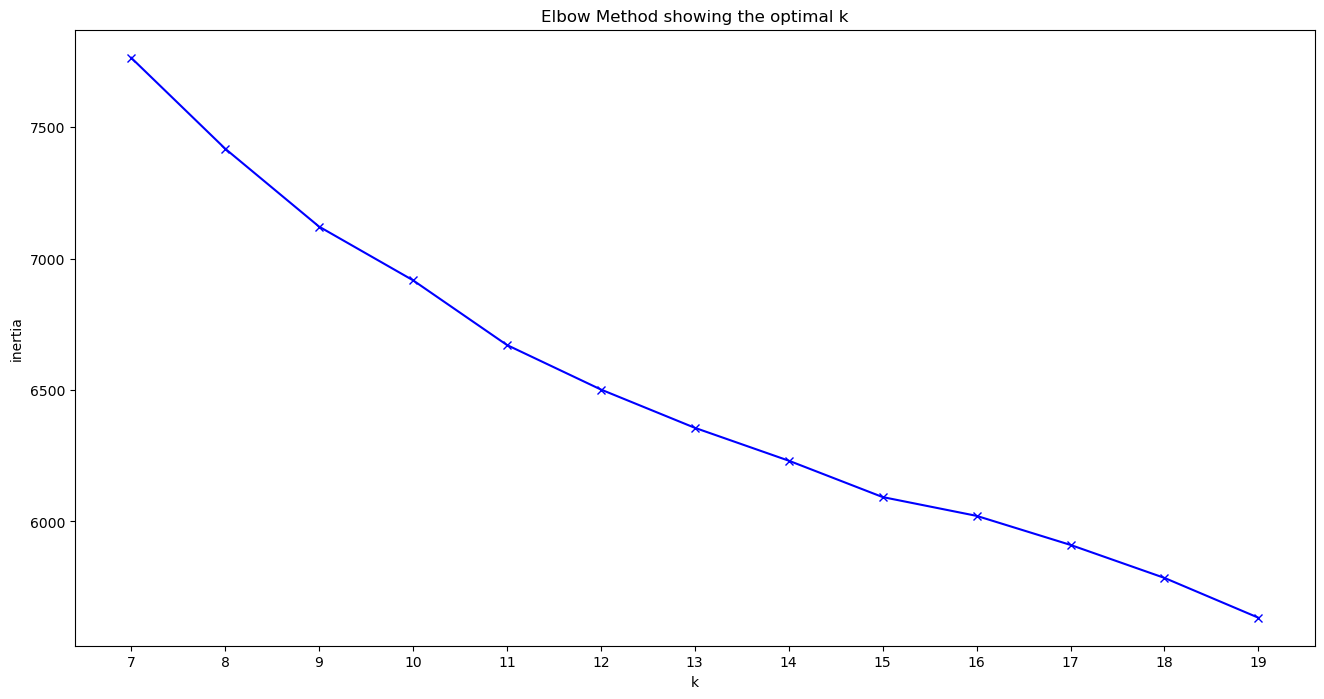

In [42]:
#choosing optimal k using lebow method
K = range(7, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    n_init=10,
                    random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

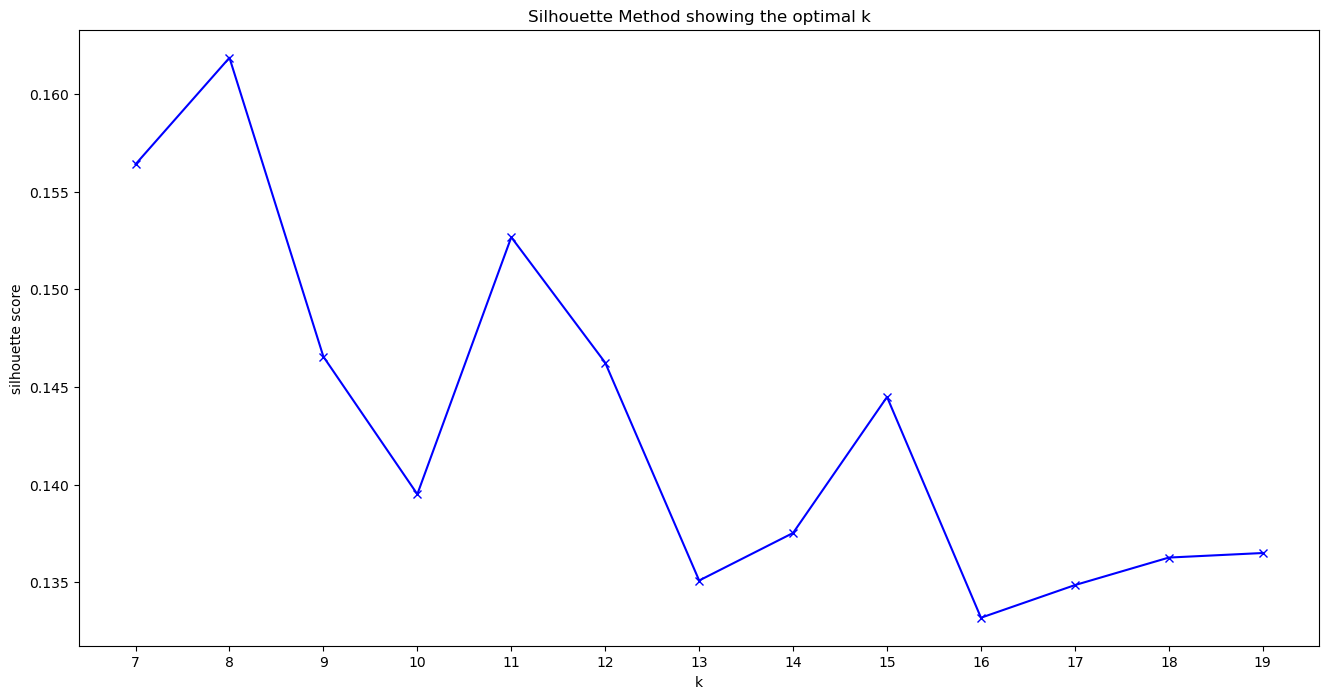

In [44]:
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    silhouette.append(silhouette_score(X_scaled, kmeans.predict(X_scaled)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [45]:
#adding clusters
clusters=kmeans.predict(X_scaled)
X_scaled_w_clusters=X_scaled
X_scaled_w_clusters['cluster']=clusters

In [48]:
#all in functions

def user_input():
    song_input=input("input your favourite song:")
    song_input=song_input.lower()
    return search_spotify(song_input)

def search_spotify(song):
    song_name=song
    result=sp.search(q=song_name,type="track",market="GB")
    song_id=result['tracks']['items'][0]['id']
    return extracting_AF(song_id)

def extracting_AF(song_id):
    song_af=pd.DataFrame(sp.audio_features(song_id))
    song_af=song_af.drop(['type', 'uri', 'track_href', 'analysis_url'], axis=1)
    song_af=song_af.set_index("id")
    return scaling_transform(song_af)

def scaling_transform(df):
    ids=df.index
    scaled_df=pd.DataFrame(scaler.transform(df), columns=df.columns)
    scaled_df=scaled_df.set_index(ids)
    return recomendation(scaled_df)

def recomendation(scaled_df):
    #getting the cluster
    cluster_for_rec=kmeans.predict(scaled_df)[0]
    #checking df with this cluster and extracting sample
    recomended_song=X_scaled_w_clusters[X_scaled_w_clusters['cluster']==cluster_for_rec].sample()
    recomended_song_id=recomended_song.index[0]
    #playing recommended song
    recomended_song_id = str(recomended_song_id)
    return IFrame(src="https://open.spotify.com/embed/track/"+recomended_song_id,
                 width="320", height="80", frameborder="0",allowtransparency="true",allow="encrypted-media")

In [49]:
user_input()

input your favourite song:numb


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
